## Will Millennials Ever Get Married?

This notebook contains analysis related to a paper on marriage patterns in the U.S., based on data from the National Survey of Family Growth (NSFG).

It is based on Chapter 13 of Think Stats, 2nd Edition, by Allen Downey, available from [thinkstats2.com](http://thinkstats2.com)

In [385]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import math

import matplotlib.pyplot as plt
from matplotlib import pylab

from scipy.interpolate import interp1d
from scipy.misc import derivative

import thinkstats2
import thinkplot
from thinkstats2 import Cdf

import survival
import marriage

Validating the 1982 data:

In [2]:
reload(marriage)

resp3 = marriage.ReadFemResp1982()
marriage.Validate1982(resp3)
resp3.shape

(7969, 21)

In [3]:
resp3.head()

,finalwgt,ageint,mar2p,cmmarrhx,fmarital,cmintvw,cmbirth,marend01,cmdivorcx,cmstphsbx,...,divorced,divsep,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,59452,25,NaN,NaN,6,997,690,NaN,NaN,NaN,...,False,False,3,NaN,25.583333,False,57,25.0,NaN,50
1,16147,27,2258.0,944.0,5,997,673,5.0,NaN,NaN,...,False,True,3,22.583333,27.000000,False,56,27.0,22.0,50
2,14618,39,2450.0,819.0,1,997,525,NaN,NaN,NaN,...,False,False,3,24.500000,39.333333,False,43,39.0,24.0,40
3,24772,26,NaN,NaN,6,993,681,NaN,NaN,NaN,...,False,False,3,NaN,26.000000,False,56,26.0,NaN,50
4,66226,17,NaN,NaN,6,997,790,NaN,NaN,NaN,...,False,False,3,NaN,17.250000,False,65,17.0,NaN,60


In [4]:
sum(resp3.cmdivorcx.isnull()), 6841+29+5+56

(6931, 6931)

In [5]:
sum((resp3.cmdivorcx >= 400) & (resp3.cmdivorcx <= 948)), 583+128

(711, 711)

In [6]:
sum((resp3.cmdivorcx >= 949) & (resp3.cmdivorcx <= 1000)), 311+16

(327, 327)

In [7]:
sum(resp3.cmstphsbx.isnull()), 7571+1+6+31

(7609, 7609)

In [8]:
sum((resp3.cmstphsbx >= 400) & (resp3.cmstphsbx <= 948)), 125+33

(158, 158)

In [9]:
sum((resp3.cmstphsbx >= 949) & (resp3.cmstphsbx <= 1000)), 197+5

(202, 202)

In [10]:
resp3.marend01.value_counts().sort_index()

3.0     119
4.0    1122
5.0     394
7.0       1
9.0       3
Name: marend01, dtype: int64

In [11]:
sum(resp3.divorced)

1122

In [12]:
sum(~resp3.cmstphsbx.isnull())

360

In [13]:
sum(~resp3.cmdivorcx.isnull())

1038

In [14]:
sum((resp3.marend01==4) & (resp3.cmdivorcx.isnull()))

84

In [15]:
sum((resp3.marend01==5) & (resp3.cmstphsbx.isnull()))

34

Validating the 1988 data:

In [16]:
reload(marriage)

resp4 = marriage.ReadFemResp1988()
marriage.Validate1988(resp4)
resp4.shape

(8450, 21)

In [17]:
resp4.head()

,finalwgt,ageint,currentcm,firstcm,cmintvw,cmbirth,marend01,cmdivorcx,cmstphsbx,cmmarrhx,...,divorced,divsep,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,713792,28,NaN,NaN,1061,723,NaN,NaN,NaN,NaN,...,False,False,4,NaN,28.166667,False,60,28.0,NaN,60
1,367022,37,NaN,NaN,1059,614,NaN,NaN,NaN,NaN,...,False,False,4,NaN,37.083333,False,51,37.0,NaN,50
2,975924,21,NaN,NaN,1057,796,NaN,NaN,NaN,NaN,...,False,False,4,NaN,21.750000,False,66,21.0,NaN,60
3,587796,39,NaN,838.0,1057,581,2.0,943.0,NaN,838.0,...,True,True,4,21.416667,39.666667,False,48,39.0,21.0,40
4,719633,31,974.0,882.0,1062,683,2.0,930.0,NaN,882.0,...,True,True,4,16.583333,31.583333,False,56,31.0,16.0,50


In [18]:
sum(resp4.cmdivorcx.isnull()), 6897+77

(6974, 6974)

In [19]:
sum((resp4.cmdivorcx >= 685) & (resp4.cmdivorcx <= 1008)), 903+152

(1055, 1055)

In [20]:
sum((resp4.cmdivorcx >= 1009) & (resp4.cmdivorcx <= 1064)), 399+22

(421, 421)

In [21]:
sum(resp4.cmstphsbx.isnull()), 8113+29

(8142, 8142)

In [22]:
sum((resp4.cmstphsbx >= 685) & (resp4.cmstphsbx <= 1008)), 75+31

(106, 106)

In [23]:
sum((resp4.cmstphsbx >= 1009) & (resp4.cmstphsbx <= 1064)), 193+9

(202, 202)

In [24]:
resp4.marend01.value_counts().sort_index()

1.0     108
2.0    1553
3.0     330
7.0       4
9.0       3
Name: marend01, dtype: int64

In [25]:
sum(resp4.divorced)

1553

In [26]:
sum(~resp4.cmstphsbx.isnull())

308

In [27]:
sum(~resp4.cmdivorcx.isnull())

1476

In [28]:
sum((resp4.marend01==2) & (resp4.cmdivorcx.isnull()))

77

In [29]:
sum((resp4.marend01==3) & (resp4.cmstphsbx.isnull()))

22

Validating the 1995 data:

In [30]:
reload(marriage)

resp5 = marriage.ReadFemResp1995()
marriage.Validate1995(resp5)
resp5.shape

(10847, 19)

In [31]:
resp5.head()

,cmintvw,timesmar,cmmarrhx,cmbirth,finalwgt,marend01,cmdivorcx,cmstphsbx,marstat,evrmarry,divorced,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,1149,NaN,NaN,837,6776.3796,NaN,NaN,NaN,5,False,False,5,NaN,26.000000,False,69,26.0,NaN,60
1,1142,1.0,1024.0,781,841.8221,NaN,NaN,NaN,4,True,False,5,20.250000,30.083333,False,65,30.0,20.0,60
2,1145,NaN,NaN,907,3617.3637,NaN,NaN,NaN,5,False,False,5,NaN,19.833333,False,75,19.0,NaN,70
3,1145,1.0,1133.0,771,10788.1271,NaN,NaN,NaN,4,True,False,5,30.166667,31.166667,False,64,31.0,30.0,60
4,1144,NaN,NaN,927,5359.4150,NaN,NaN,NaN,5,False,False,5,NaN,18.083333,False,77,18.0,NaN,70


In [32]:
sum(resp5.cmdivorcx.isnull()), 9601+1+1+22

(9625, 9625)

In [33]:
sum((resp5.cmdivorcx >= 780) & (resp5.cmdivorcx <= 1092)), 1116

(1116, 1116)

In [34]:
sum((resp5.cmdivorcx >= 1093) & (resp5.cmdivorcx <= 1150)), 106

(106, 106)

In [35]:
sum(resp5.cmstphsbx.isnull()), 9601+1+15

(9617, 9617)

In [36]:
sum((resp5.cmstphsbx >= 780) & (resp5.cmstphsbx <= 1092)), 1167

(1167, 1167)

In [37]:
sum((resp5.cmstphsbx >= 1093) & (resp5.cmstphsbx <= 1150)), 63

(63, 63)

In [38]:
resp5.marend01.value_counts().sort_index()

1.0      33
2.0    1223
3.0      23
7.0       2
9.0       1
Name: marend01, dtype: int64

In [39]:
sum(resp5.divorced)

1246

In [40]:
sum(~resp5.cmstphsbx.isnull())

1230

In [41]:
sum(~resp5.cmdivorcx.isnull())

1222

In [42]:
sum((resp5.marend01==2) & (resp5.cmdivorcx.isnull()))

19

In [43]:
sum((resp5.marend01==3) & (resp5.cmdivorcx.isnull()))

5

In [44]:
sum((~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

0

In [45]:
resp5.marstat.value_counts().sort_index()

1    5291
2      93
3    1008
4     452
5    4003
Name: marstat, dtype: int64

In [46]:
sum((resp5.marstat==4) & (~resp5.divorced))   # separated and not divorced

360

In [47]:
sum((resp5.marstat==4) & (~resp5.divorced) & (~resp5.cmstphsbx.isnull()))

0

Validating the 2002 data:

In [48]:
reload(marriage)

resp6 = marriage.ReadFemResp2002()
marriage.Validate2002(resp6)
resp6.shape

(7643, 26)

In [49]:
resp6.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,parity,rmarital,fmarno,mardat01,mardis01,...,widowed,stillma,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,2298,902,False,NaN,NaN,4,2,0,NaN,NaN,...,False,False,6,NaN,27.666667,False,75,27.0,NaN,70
1,5012,718,True,974.0,1077.0,1,1,2,974.0,1077.0,...,False,False,6,21.333333,42.916667,False,59,42.0,21.0,50
2,11586,708,True,910.0,938.0,1,4,1,910.0,921.0,...,False,False,6,16.833333,43.833333,False,58,43.0,16.0,50
3,6794,1042,False,NaN,NaN,0,6,0,NaN,NaN,...,False,False,6,NaN,16.000000,False,86,16.0,NaN,80
4,616,991,False,NaN,NaN,0,6,0,NaN,NaN,...,False,False,6,NaN,20.166667,False,82,20.0,NaN,80


In [50]:
sum(resp6.cmdivorcx.isnull()), 6639+2+20

(6639, 6661)

In [51]:
sum((resp6.cmdivorcx >= 301) & (resp6.cmdivorcx <= 1164)), 607

(607, 607)

In [52]:
sum((resp6.cmdivorcx >= 1165) & (resp6.cmdivorcx <= 1239)), 375

(375, 375)

In [53]:
resp6.marend01.value_counts().sort_index()

1.0    1232
2.0     260
3.0      58
Name: marend01, dtype: int64

In [54]:
sum(resp6.divorced), sum(resp6.loc[resp6.divorced, 'mar1diss'].isnull())

(1232, 0)

In [55]:
sum(resp6.separated), sum(resp6.loc[resp6.separated, 'mar1diss'].isnull())

(260, 0)

In [56]:
sum(resp6.widowed), sum(resp6.loc[resp6.widowed, 'mar1diss'].isnull())

(58, 0)

In [57]:
sum(resp6.stillma), sum(resp6.loc[resp6.stillma, 'mar1diss'].isnull())

(2576, 0)

In [58]:
sum(resp6.evrmarry), 1232+260+58+2576

(4126, 4126)

Validating the 2010 data:

In [59]:
reload(marriage)

resp7 = marriage.ReadFemResp2010()
marriage.Validate2010(resp7)
resp7.shape

(12279, 27)

In [60]:
resp7.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,34156,799,False,NaN,NaN,6,0,0,NaN,NaN,...,False,2571.376599,7,NaN,43.666667,False,66,43.0,NaN,60
1,40081,925,True,1314.0,NaN,1,0,1,1314.0,NaN,...,True,11716.317848,7,32.416667,33.166667,False,77,33.0,32.0,70
2,32817,958,False,NaN,NaN,6,0,0,NaN,NaN,...,False,6794.156444,7,NaN,27.416667,False,79,27.0,NaN,70
3,39968,869,False,NaN,NaN,6,0,0,NaN,NaN,...,False,5469.435481,7,NaN,37.833333,False,72,37.0,NaN,70
4,27121,1004,False,NaN,NaN,6,0,0,NaN,NaN,...,False,6544.538107,7,NaN,23.416667,False,83,23.0,NaN,80


In [61]:
sum(resp7.cmdivorcx.isnull()), 10705+1+19

(10705, 10725)

In [62]:
sum((resp7.cmdivorcx >= 522) & (resp7.cmdivorcx <= 1278)), 1286

(1286, 1286)

In [63]:
sum((resp7.cmdivorcx >= 1279) & (resp7.cmdivorcx <= 1290)), 106

(106, 106)

In [64]:
sum((resp7.cmdivorcx >= 1291) & (resp7.cmdivorcx <= 1308)), 112

(112, 112)

In [65]:
sum((resp7.cmdivorcx >= 1309) & (resp7.cmdivorcx <= 1326)), 50

(50, 50)

In [66]:
resp7.marend01.value_counts().sort_index()

1.0    1574
2.0     405
3.0      68
Name: marend01, dtype: int64

In [67]:
sum(resp7.divorced), sum(resp7.loc[resp7.divorced, 'mar1diss'].isnull())

(1574, 0)

In [68]:
sum(resp7.separated), sum(resp7.loc[resp7.separated, 'mar1diss'].isnull())

(405, 0)

In [69]:
sum(resp7.widowed), sum(resp7.loc[resp7.widowed, 'mar1diss'].isnull())

(68, 0)

In [70]:
sum(resp7.stillma), sum(resp7.loc[resp7.stillma, 'mar1diss'].isnull())

(3487, 0)

In [71]:
sum(resp7.evrmarry), 1574+405+68+3487

(5534, 5534)

Validating the 2013 data:

In [72]:
reload(marriage)

resp8 = marriage.ReadFemResp2013()
marriage.Validate2013(resp8)
resp8.shape

(5601, 27)

In [73]:
resp8.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,50002,922,True,1303.0,NaN,5,1,1,1303.0,1353.0,...,False,1973.648419,8,31.750000,36.250000,False,76,36.0,31.0,70
1,50004,986,True,1215.0,1243.0,5,0,2,1215.0,1219.0,...,False,2584.350089,8,19.083333,29.750000,False,82,29.0,19.0,80
2,50005,1001,False,NaN,NaN,2,1,0,NaN,NaN,...,False,6533.272794,8,NaN,30.000000,False,83,30.0,NaN,80
3,50008,834,False,NaN,NaN,6,3,0,NaN,NaN,...,False,2543.439624,8,NaN,43.333333,False,69,43.0,NaN,60
4,50013,1127,False,NaN,NaN,6,0,0,NaN,NaN,...,False,6283.773455,8,NaN,19.750000,False,93,19.0,NaN,90


In [74]:
sum(resp8.cmdivorcx.isnull()), 4851+2+24

(4851, 4877)

In [75]:
sum((resp8.cmdivorcx >= 380) & (resp8.cmdivorcx <= 1340)), 658

(658, 658)

In [76]:
sum((resp8.cmdivorcx >= 1341) & (resp8.cmdivorcx <= 1352)), 48

(48, 48)

In [77]:
sum((resp8.cmdivorcx >= 1353) & (resp8.cmdivorcx <= 1365)), 18

(18, 18)

In [78]:
resp8.marend01.value_counts().sort_index()

1.0    755
2.0    214
3.0     26
Name: marend01, dtype: int64

In [79]:
sum(resp8.divorced), sum(resp8.loc[resp8.divorced, 'mar1diss'].isnull())

(755, 0)

In [80]:
sum(resp8.separated), sum(resp8.loc[resp8.separated, 'mar1diss'].isnull())

(214, 0)

In [81]:
sum(resp8.widowed), sum(resp8.loc[resp8.widowed, 'mar1diss'].isnull())

(26, 0)

In [82]:
sum(resp8.stillma), sum(resp8.loc[resp8.stillma, 'mar1diss'].isnull())

(1457, 0)

In [83]:
sum(resp8.evrmarry), 755+214+26+1457

(2452, 2452)

Validating the 2015 data:

In [84]:
reload(marriage)

resp9 = marriage.ReadFemResp2015()
marriage.Validate2015(resp9)
resp9.shape

(5699, 27)

In [85]:
resp9.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,60418,921,True,1159.0,1269.0,2,3,1,1159.0,1258.0,...,False,3554.964843,9,19.833333,38.333333,False,76,38.0,19.0,70
1,60419,942,True,1207.0,1253.0,2,0,1,1207.0,1253.0,...,False,2484.535358,9,22.083333,37.166667,False,78,37.0,22.0,70
2,60420,981,False,NaN,NaN,6,1,0,NaN,NaN,...,False,2903.782914,9,NaN,33.916667,False,81,33.0,NaN,80
3,60423,1010,False,NaN,NaN,6,2,0,NaN,NaN,...,False,2738.498331,9,NaN,31.416667,False,84,31.0,NaN,80
4,60426,897,True,1256.0,NaN,1,1,1,1256.0,NaN,...,True,9682.211381,9,29.916667,39.250000,False,74,39.0,29.0,70


In [86]:
sum(resp9.cmdivorcx.isnull()), 4946+3+18

(4946, 4967)

In [87]:
sum((resp9.cmdivorcx >= 378) & (resp9.cmdivorcx <= 1340)), 563

(563, 563)

In [88]:
sum((resp9.cmdivorcx >= 1341) & (resp9.cmdivorcx <= 1352)), 56

(56, 56)

In [89]:
sum((resp9.cmdivorcx >= 1353) & (resp9.cmdivorcx <= 1364)), 48

(48, 48)

In [90]:
sum((resp9.cmdivorcx >= 1365) & (resp9.cmdivorcx <= 1376)), 46

(46, 46)

In [91]:
sum((resp9.cmdivorcx >= 1377) & (resp9.cmdivorcx <= 1389)), 19

(19, 19)

In [92]:
resp9.marend01.value_counts().sort_index()

1.0    756
2.0    169
3.0     28
Name: marend01, dtype: int64

In [93]:
sum(resp9.divorced), sum(resp9.loc[resp9.divorced, 'mar1diss'].isnull())

(756, 0)

In [94]:
sum(resp9.separated), sum(resp9.loc[resp9.separated, 'mar1diss'].isnull())

(169, 0)

In [95]:
sum(resp9.widowed), sum(resp9.loc[resp9.widowed, 'mar1diss'].isnull())

(28, 0)

In [96]:
sum(resp9.stillma), sum(resp9.loc[resp9.stillma, 'mar1diss'].isnull())

(1448, 0)

In [97]:
sum(resp9.evrmarry), 756+169+28+1448

(2401, 2401)

Validating 2015 data for marriage analysis

In [98]:
resp9 = marriage.ReadFemResp2015()
marriage.Validate2015(resp9)

In [99]:
resp9.head()

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,rmarital,parity,fmarno,mardat01,mardis01,...,stillma,finalwgt,cycle,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,60418,921,True,1159.0,1269.0,2,3,1,1159.0,1258.0,...,False,3554.964843,9,19.833333,38.333333,False,76,38.0,19.0,70
1,60419,942,True,1207.0,1253.0,2,0,1,1207.0,1253.0,...,False,2484.535358,9,22.083333,37.166667,False,78,37.0,22.0,70
2,60420,981,False,NaN,NaN,6,1,0,NaN,NaN,...,False,2903.782914,9,NaN,33.916667,False,81,33.0,NaN,80
3,60423,1010,False,NaN,NaN,6,2,0,NaN,NaN,...,False,2738.498331,9,NaN,31.416667,False,84,31.0,NaN,80
4,60426,897,True,1256.0,NaN,1,1,1,1256.0,NaN,...,True,9682.211381,9,29.916667,39.250000,False,74,39.0,29.0,70


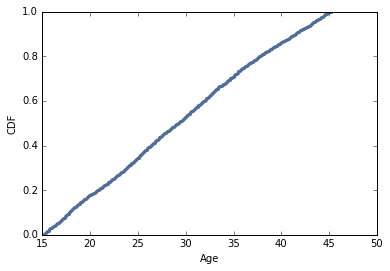

In [100]:
thinkplot.Cdf(Cdf(resp9.age))
thinkplot.Config(xlabel='Age', ylabel='CDF')

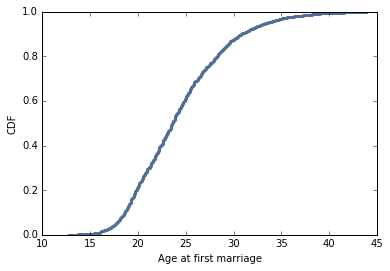

In [101]:
thinkplot.Cdf(Cdf(resp9.agemarry))
thinkplot.Config(xlabel='Age at first marriage', ylabel='CDF')

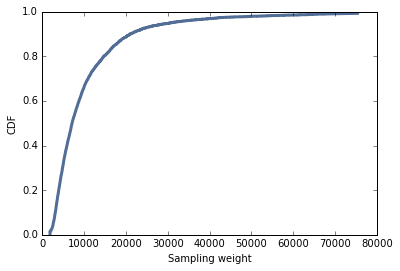

In [102]:
thinkplot.Cdf(Cdf(resp9.finalwgt))
thinkplot.Config(xlabel='Sampling weight', ylabel='CDF')

Loading the rest of the data

In [103]:
resp8 = marriage.ReadFemResp2013()
marriage.Validate2013(resp8)

resp7 = marriage.ReadFemResp2010()
marriage.Validate2010(resp7)

resp6 = marriage.ReadFemResp2002()
marriage.Validate2002(resp6)

resp5 = marriage.ReadFemResp1995()
marriage.Validate1995(resp5)

resp4 = marriage.ReadFemResp1988()
marriage.Validate1988(resp4)

resp3 = marriage.ReadFemResp1982()
marriage.Validate1982(resp3)

Make a list of DataFrames, one for each cycle:

In [104]:
resps = [resp9, resp8, resp7, resp6, resp5, resp4, resp3]
#resps = [resp9]

Make a table showing the number of respondents in each cycle:

In [105]:
def SummarizeCycle(df):
    ages = df.age.min(), df.age.max()
    ages= np.array(ages)
    
    intvws = df.cmintvw.min(), df.cmintvw.max()
    intvws = np.array(intvws) / 12 + 1900
    
    births = df.cmbirth.min(), df.cmbirth.max()
    births = np.array(births) / 12 + 1900

    print('# & ', intvws.astype(int), '&', len(df), '&', births.astype(int), r'\\')
    
for resp in reversed(resps):
    SummarizeCycle(resp)

# &  [1982 1983] & 7969 & [1937 1968] \\
# &  [1988 1988] & 8450 & [1943 1973] \\
# &  [1995 1995] & 10847 & [1950 1980] \\
# &  [2002 2003] & 7643 & [1957 1988] \\
# &  [2006 2010] & 12279 & [1961 1995] \\
# &  [2011 2013] & 5601 & [1966 1998] \\
# &  [2013 2015] & 5699 & [1968 2000] \\


Check for missing values in `agemarry`:

In [106]:
def CheckAgeVars(df):
    print(sum(df[df.evrmarry].agemarry.isnull()))
    
for resp in resps:
    CheckAgeVars(resp)

11
17
16
37
0
0
0


Combine the DataFrames (but remember that this is not resampled properly):

In [107]:
df = pd.concat(resps, ignore_index=True)
len(df)

58488

In [108]:
df.to_csv('FemMarriageData.csv')

Double check missing data:

In [109]:
sum(df.missing)

81

Generate a table with the number of respondents in each cohort:

In [110]:
marriage.DigitizeResp(df)
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    print(name, '&', len(group), '&', int(group.age.min()), '--', int(group.age_index.max()),
                '&', len(group[group.evrmarry]), '&', sum(group.missing), r'\\')

30 & 325 & 42 -- 45 & 310 & 0 \\
40 & 3608 & 32 -- 45 & 3278 & 0 \\
50 & 10631 & 22 -- 45 & 8659 & 10 \\
60 & 14558 & 15 -- 45 & 8484 & 28 \\
70 & 13700 & 14 -- 45 & 7090 & 30 \\
80 & 10637 & 14 -- 35 & 3218 & 13 \\
90 & 5014 & 15 -- 25 & 234 & 0 \\
100 & 15 & 15 -- 15 & 0 & 0 \\


In [111]:
def ComputeCutoffs(df):
    grouped = df.groupby('birth_index')
    cutoffs = {}
    for name, group in sorted(grouped):
        cutoffs[name] = int(group.age.max())
    return cutoffs

cutoffs = ComputeCutoffs(df)
cutoffs

{30: 45, 40: 45, 50: 45, 60: 45, 70: 45, 80: 35, 90: 25, 100: 15}

Estimate the hazard function for the 80s cohort (curious to see what's going on during the "marriage strike")

In [112]:
cohort = grouped.get_group(80)
missing = (cohort.evrmarry & cohort.agemarry.isnull())
cohort = cohort[~missing]
complete = cohort[cohort.evrmarry].agemarry_index
ongoing = cohort[~cohort.evrmarry].age_index
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

13.0 10624 8 0 0.000753012048193
14.0 10616 9 14 0.000847776940467
15.0 10593 31 260 0.00292646087039
16.0 10302 82 242 0.00795961949136
17.0 9978 103 338 0.0103227099619
18.0 9537 271 460 0.0284156443326
19.0 8806 358 569 0.0406540994776
20.0 7879 346 579 0.0439142023099
21.0 6954 352 572 0.0506183491516
22.0 6030 361 572 0.0598673300166
23.0 5097 303 454 0.0594467333726
24.0 4340 286 533 0.0658986175115
25.0 3521 250 576 0.071002556092
26.0 2695 154 531 0.0571428571429
27.0 2010 119 447 0.0592039800995
28.0 1444 79 322 0.0547091412742
29.0 1043 48 283 0.046021093001
30.0 712 26 199 0.0365168539326
31.0 487 15 180 0.0308008213552
32.0 292 2 147 0.00684931506849
33.0 143 2 83 0.013986013986
34.0 58 0 42 0.0
35.0 16 0 16 0.0


Run the same analysis for the 70s cohort (to extract $\lambda(33)$).

In [113]:
cohort = grouped.get_group(70)
missing = (cohort.evrmarry & cohort.agemarry.isnull())
cohort = cohort[~missing]
complete = cohort[cohort.evrmarry].agemarry_index
ongoing = cohort[~cohort.evrmarry].age_index
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

10.0 13670 1 0 7.31528895391e-05
11.0 13669 1 0 7.31582412759e-05
12.0 13668 3 0 0.000219490781387
13.0 13665 7 0 0.000512257592389
14.0 13658 27 3 0.00197686337678
15.0 13628 58 388 0.00425594364544
16.0 13182 153 518 0.0116067364588
17.0 12511 231 540 0.0184637518983
18.0 11740 503 340 0.0428449744463
19.0 10897 594 268 0.0545104157107
20.0 10035 572 242 0.0570004982561
21.0 9221 616 220 0.0668040342696
22.0 8385 613 264 0.073106738223
23.0 7508 599 347 0.0797815663292
24.0 6562 545 345 0.0830539469674
25.0 5672 492 205 0.0867418899859
26.0 4975 433 149 0.0870351758794
27.0 4393 313 164 0.0712497154564
28.0 3916 330 198 0.0842696629213
29.0 3388 257 215 0.0758559622196
30.0 2916 203 315 0.0696159122085
31.0 2398 130 278 0.0542118432027
32.0 1990 115 212 0.0577889447236
33.0 1663 76 155 0.0457005411906
34.0 1432 63 173 0.0439944134078
35.0 1196 45 216 0.0376254180602
36.0 935 21 198 0.0224598930481
37.0 716 19 162 0.0265363128492
38.0 535 14 121 0.0261682242991
39.0 400 10 106 0.025
4

Use the 30s cohort to demonstrate the simple way to do survival analysis, by computing the survival function directly.

[ 0.99384615  0.96923077  0.94769231  0.90153846  0.81846154  0.68615385
  0.56        0.46461538  0.36307692  0.29538462  0.26153846  0.23384615
  0.21230769  0.17538462  0.14769231  0.13230769  0.11076923  0.10153846
  0.08923077  0.07692308  0.07384615  0.06461538  0.06153846  0.05846154
  0.05538462  0.04923077  0.04615385  0.        ]


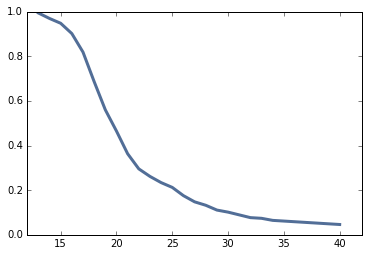

In [114]:
cohort = grouped.get_group(30)
sf = survival.MakeSurvivalFromSeq(cohort.agemarry_index.fillna(np.inf))
ts, ss = sf.Render()
print(ss)
thinkplot.Plot(ts, ss)
thinkplot.Config(xlim=[12, 42])

Then use the SurvivalFunction to compute the HazardFunction:

[ 0.00615385  0.0247678   0.02222222  0.0487013   0.09215017  0.16165414
  0.1838565   0.17032967  0.21854305  0.18644068  0.11458333  0.10588235
  0.09210526  0.17391304  0.15789474  0.10416667  0.1627907   0.08333333
  0.12121212  0.13793103  0.04        0.125       0.04761905  0.05
  0.05263158  0.11111111  0.0625      1.        ]


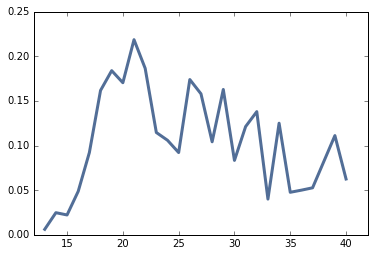

In [115]:
hf = sf.MakeHazardFunction()
ts, lams = hf.Render()
print(lams)
thinkplot.Plot(ts, lams)
thinkplot.Config(xlim=[12, 42])

Make the first figure, showing sf and hf for the 30s cohort:

In [116]:
options = dict(formats=['pdf', 'png'], clf=False)

Writing marriage1.pdf
Writing marriage1.png


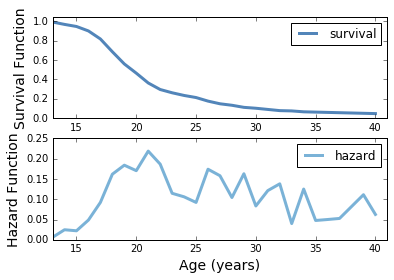

In [117]:
thinkplot.PrePlot(2, rows=2)

thinkplot.Plot(sf, label='survival')
thinkplot.Config(xlim=[13, 41], ylim=[0, 1.05])
plt.ylabel('Survival Function', fontsize=14)

thinkplot.SubPlot(2)
thinkplot.Plot(hf, label='hazard')
thinkplot.Config(xlabel='age(years)', ylabel='Hazard function', xlim=[13, 41])
plt.ylabel('Hazard Function', fontsize=14)
plt.xlabel('Age (years)', fontsize=14)

thinkplot.Save(root='marriage1', **options)

Writing marriage2.pdf
Writing marriage2.png


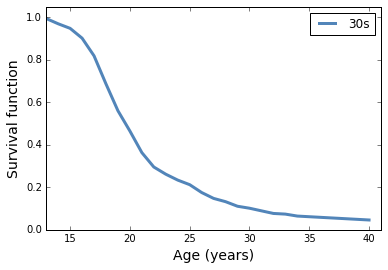

In [118]:
thinkplot.PrePlot(1)

thinkplot.Plot(sf, label='30s')
thinkplot.Config(xlim=[13, 41], ylim=[0, 1.05])
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Survival function', fontsize=14)

thinkplot.Save(root='marriage2', **options)

Writing marriage3.pdf
Writing marriage3.png


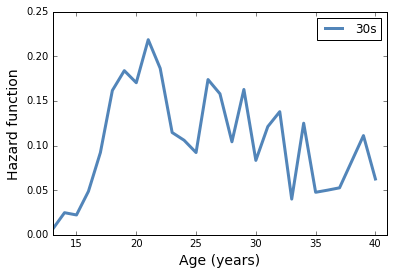

In [119]:
thinkplot.PrePlot(1)

thinkplot.Plot(hf, label='30s')
thinkplot.Config(xlim=[13, 41])
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Hazard function', fontsize=14)

thinkplot.Save(root='marriage3', **options)

Make some pivot tables, just to see where the data are:

In [120]:
pt = df.pivot_table(index='birth_index', columns='age_index', values='age', aggfunc=len, fill_value=0)
pt

age_index,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,...,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0
birth_index,,,,,,,,,,,,,,,,,,,,,
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,19,146,148,12
40,0,0,0,0,0,0,0,0,0,0,...,202,163,345,452,442,414,384,194,198,25
50,0,0,0,0,0,0,0,0,42,301,...,745,768,492,427,396,371,482,633,533,38
60,0,269,300,370,665,722,609,513,520,242,...,282,359,417,466,595,562,537,512,517,33
70,3,389,523,549,362,293,283,285,365,572,...,700,610,486,432,290,310,233,203,105,1
80,14,260,242,340,483,589,658,683,705,602,...,0,0,0,0,0,0,0,0,0,0
90,0,749,804,784,678,563,351,378,308,215,...,0,0,0,0,0,0,0,0,0,0
100,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The following pivot table is not as helpful as it could be, since it doesn't show the number at risk.

In [121]:
df.pivot_table(index='birth_index', columns='agemarry_index', values='age', aggfunc=len, fill_value=0)

agemarry_index,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,...,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0
birth_index,,,,,,,,,,,,,,,,,,,,,
30,0,0,0,2,8,7,15,27,43,41,...,3,1,1,1,0,2,1,0,0,0
40,1,0,0,5,31,87,163,218,425,467,...,15,12,6,6,3,9,3,1,0,0
50,0,0,1,10,50,125,384,642,1111,1057,...,50,33,27,18,12,11,7,4,4,4
60,0,1,1,5,36,114,289,423,823,810,...,64,62,32,36,22,22,14,11,7,4
70,1,1,3,7,27,58,153,232,503,594,...,63,45,21,19,14,10,8,1,5,2
80,0,0,0,8,9,31,82,103,271,358,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,1,3,8,17,41,45,...,0,0,0,0,0,0,0,0,0,0


Estimate the survival curve for each cohort:

In [130]:
for df in resps:
    df['complete'] = df.evrmarry
    df['complete_var'] = df.agemarry_index
    df['ongoing_var'] = df.age_index
    df['complete_missing'] = df.complete & df.complete_var.isnull()
    df['ongoing_missing'] = ~df.complete & df.ongoing_var.isnull()
    print(sum(df.complete_missing), sum(df.ongoing_missing))

11 0
17 0
16 0
37 0
0 0
0 0
0 0


In [143]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(resps, iters=11, cutoffs=cutoffs)
del sf_map[30]
del sf_map[100]

CPU times: user 3.14 s, sys: 16 ms, total: 3.15 s
Wall time: 3.14 s


Check a sample:

In [144]:
for sf in sf_map[90]:
    print(sf.ss)
    print(sf.Prob(34))
    break

15.0    0.999784
16.0    0.999021
17.0    0.994422
18.0    0.970782
19.0    0.948432
20.0    0.921897
21.0    0.888742
22.0    0.841438
23.0    0.807040
24.0    0.807040
dtype: float64
0.807039802786


In [145]:
for sf in sf_map[80]:
    print(sf.ss)
    print(sf.Prob(34))
    break

13.0    0.999609
14.0    0.999511
15.0    0.996569
16.0    0.990817
17.0    0.980242
18.0    0.950401
19.0    0.912336
20.0    0.869310
21.0    0.817647
22.0    0.757880
23.0    0.705138
24.0    0.649904
25.0    0.590181
26.0    0.540766
27.0    0.489233
28.0    0.452302
29.0    0.423420
30.0    0.408511
31.0    0.390941
32.0    0.387526
33.0    0.384035
34.0    0.384035
dtype: float64
0.384034967465


Make the figure showing estimated survival curves:

Writing marriage4.pdf
Writing marriage4.png


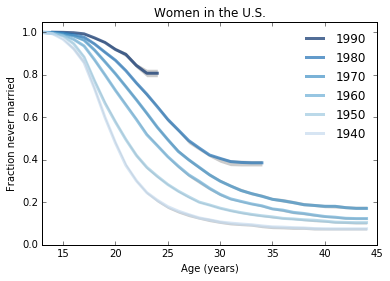

In [146]:
reload(marriage)
reload(thinkplot)

def PlotSurvivalFunctions(root, sf_map, sf_map_pred=None, **options):

    if sf_map_pred:
        marriage.PlotSurvivalFunctions(sf_map_pred, predict_flag=True)
    marriage.PlotSurvivalFunctions(sf_map)

    thinkplot.Config(xlim=[13, 45], ylim=[0, 1.05])
    thinkplot.Save(root=root, **options)

options_w = dict(formats=['pdf', 'png'], clf=False, title='Women in the U.S.', frameon=False)
PlotSurvivalFunctions('marriage4', sf_map, None, **options_w)

Make a table of marriage rates for each cohort at each age:

In [147]:
def MakeTable(sf_map, ages):
    t = []
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        t.append((name, vals))
    return t

In [148]:
def MakePercentageTable(sf_map, ages=[23, 33, 43]):
    t = MakeTable(sf_map, ages)
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        print(name, '&', ' & '.join('%0.0f' % (val*100) for val in vals), r'\\')
        
MakePercentageTable(sf_map)

40 & 25 & 9 & 8 \\
50 & 36 & 14 & 10 \\
60 & 52 & 19 & 12 \\
70 & 62 & 24 & 17 \\
80 & 71 & 39 & nan \\
90 & 81 & nan & nan \\


Generate projections:

In [150]:
%time sf_map_pred = marriage.EstimateSurvivalByCohort(resps, iters=11, cutoffs=cutoffs, predict_flag=True)
del sf_map_pred[30]
del sf_map_pred[100]

CPU times: user 3.32 s, sys: 36 ms, total: 3.35 s
Wall time: 3.34 s


And make the figure showing projections:

Writing marriage5.pdf
Writing marriage5.png


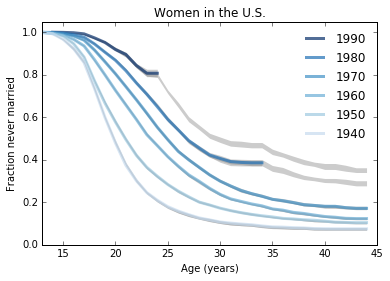

In [151]:
PlotSurvivalFunctions('marriage5', sf_map, sf_map_pred, **options_w)

Make the table again with the projections filled in.

In [152]:
MakePercentageTable(sf_map_pred)

40 & 25 & 9 & 7 \\
50 & 36 & 14 & 11 \\
60 & 52 & 19 & 12 \\
70 & 62 & 24 & 17 \\
80 & 71 & 39 & 29 \\
90 & 80 & 47 & 36 \\


In [153]:
def PlotFractions(sf_map, ages=[23, 33], label_flag=False, **options):
    t = MakeTable(sf_map, ages)
    cohorts, cols = zip(*t)
    rows = zip(*cols)

    thinkplot.PrePlot(3)
    for age, row in reversed(zip(ages, rows)):
        label = 'at age %d' % age if label_flag else ''
        thinkplot.Plot(cohorts, row, label=label, **options)

Writing marriage6.pdf
Writing marriage6.png


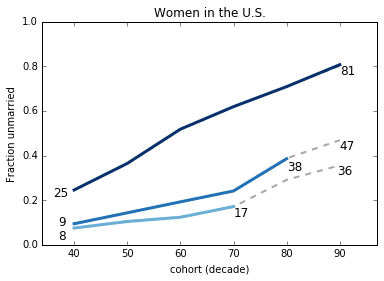

In [154]:
ages = [43, 33, 23]
PlotFractions(sf_map_pred, ages=ages, color='gray', linestyle='dashed', linewidth=2)
PlotFractions(sf_map, ages=ages, label_flag=True, alpha=1)

fontsize=12
thinkplot.Text(36, 0.26, '25', fontsize=fontsize)
thinkplot.Text(37, 0.13, '9', fontsize=fontsize)
thinkplot.Text(37, 0.07, '8', fontsize=fontsize)

thinkplot.Text(90, 0.81, '81', fontsize=fontsize)
thinkplot.Text(90, 0.47, '47', fontsize=fontsize)
thinkplot.Text(89.5, 0.36, '36', fontsize=fontsize)

thinkplot.Text(80, 0.38, '38', fontsize=fontsize)
thinkplot.Text(70, 0.17, '17', fontsize=fontsize)

thinkplot.Config(xlim=[34, 97], ylim=[0, 1], legend=True, loc='top left',
                 xlabel='cohort (decade)', ylabel='Fraction unmarried', 
                 title='Women in the U.S.')

thinkplot.Save(root='marriage6', **options)

## Marriage patterns for men

In [155]:
male2002 = marriage.ReadMaleResp2002()
male2002.head()

,caseid,cmbirth,evrmarry,cmdivw,mardat01,finalwgt,cmintvw,cmmarrhx,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,12178,1052,False,NaN,NaN,7085.207973,1233,NaN,NaN,15.083333,False,87,15.0,NaN,80
1,3233,701,True,NaN,1007.0,24372.450063,1237,1007.0,25.500000,44.666667,False,58,44.0,25.0,50
2,12170,707,True,NaN,1199.0,7073.132109,1234,1199.0,41.000000,43.916667,False,58,43.0,41.0,50
3,6629,1052,False,NaN,NaN,3105.158992,1234,NaN,NaN,15.166667,False,87,15.0,NaN,80
4,6531,787,True,NaN,1107.0,4679.548824,1235,1107.0,26.666667,37.333333,False,65,37.0,26.0,60


In [156]:
male2010 = marriage.ReadMaleResp2010()
male2010.head()

,caseid,cmbirth,evrmarry,cmdivw,mardat01,wgtq1q16,cmintvw,cmmarrhx,finalwgt,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,36133,1043,False,NaN,NaN,7270.577055,1323,NaN,7270.577055,NaN,23.333333,False,86,23.0,NaN,80
1,36636,1021,False,NaN,NaN,7601.733277,1322,NaN,7601.733277,NaN,25.083333,False,85,25.0,NaN,80
2,41125,1118,False,NaN,NaN,4587.699601,1322,NaN,4587.699601,NaN,17.000000,False,93,17.0,NaN,90
3,23607,948,False,NaN,NaN,26566.111007,1287,NaN,26566.111007,NaN,28.250000,False,78,28.0,NaN,70
4,40814,1018,False,NaN,NaN,5709.710317,1322,NaN,5709.710317,NaN,25.333333,False,84,25.0,NaN,80


In [157]:
male2013 = marriage.ReadMaleResp2013()
male2013.head()

,caseid,cmbirth,evrmarry,cmdivw,mardat01,wgt2011_2013,cmintvw,cmmarrhx,finalwgt,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,50001,1027,True,1346.0,1237.0,8111.081751,1348,1237.0,8111.081751,17.500000,26.750000,False,85,26.0,17.0,80
1,50003,1160,False,NaN,NaN,4082.414347,1354,NaN,4082.414347,NaN,16.166667,False,96,16.0,NaN,90
2,50006,1025,True,NaN,1335.0,25550.455475,1360,1335.0,25550.455475,25.833333,27.916667,False,85,27.0,25.0,80
3,50007,1028,False,NaN,NaN,6754.912773,1348,NaN,6754.912773,NaN,26.666667,False,85,26.0,NaN,80
4,50009,855,True,NaN,1152.0,49442.342886,1362,1152.0,49442.342886,24.750000,42.250000,False,71,42.0,24.0,70


In [158]:
male2015 = marriage.ReadMaleResp2015()
male2015.head()

,caseid,cmbirth,evrmarry,cmdivw,mardat01,wgt2013_2015,cmintvw,cmmarrhx,finalwgt,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,60417,926,False,NaN,NaN,7693.012917,1379,NaN,7693.012917,NaN,37.750000,False,77,37.0,NaN,70
1,60421,1161,False,NaN,NaN,9643.271157,1377,NaN,9643.271157,NaN,18.000000,False,96,18.0,NaN,90
2,60422,980,False,NaN,NaN,9650.615384,1376,NaN,9650.615384,NaN,33.000000,False,81,33.0,NaN,80
3,60424,990,True,NaN,1326.0,11590.039167,1376,1326.0,11590.039167,28.000000,32.166667,False,82,32.0,28.0,80
4,60425,1143,True,NaN,1376.0,6864.914673,1383,1376.0,6864.914673,19.416667,20.000000,False,95,20.0,19.0,90


In [159]:
males = [male2002, male2010, male2013, male2015]
df2 = pd.concat(males, ignore_index=True)
len(df2)

24652

In [160]:
sum(df2.missing)

0

In [161]:
marriage.DigitizeResp(df2)
grouped = df2.groupby('birth_index')
for name, group in iter(grouped):
    print(name, '&', len(group), '&', int(group.age.min()), '--', int(group.age_index.max()),
                '&', len(group[group.evrmarry]), '&', sum(group.missing), r'\\')

50 & 322 & 42 -- 45 & 225 & 0 \\
60 & 3668 & 32 -- 45 & 2530 & 0 \\
70 & 7215 & 22 -- 45 & 4111 & 0 \\
80 & 8535 & 15 -- 35 & 1826 & 0 \\
90 & 4893 & 15 -- 25 & 90 & 0 \\
100 & 19 & 15 -- 15 & 0 & 0 \\


In [162]:
cutoffs2 = ComputeCutoffs(df2)
cutoffs2

{50: 45, 60: 45, 70: 45, 80: 35, 90: 25, 100: 15}

In [164]:
for df in males:
    df['complete'] = df.evrmarry
    df['complete_var'] = df.agemarry_index
    df['ongoing_var'] = df.age_index
    df['complete_missing'] = df.complete & df.complete_var.isnull()
    df['ongoing_missing'] = ~df.complete & df.ongoing_var.isnull()
    print(sum(df.complete_missing), sum(df.ongoing_missing))

0 0
0 0
0 0
0 0


In [165]:
%time sf_map_male = marriage.EstimateSurvivalByCohort(males, iters=21, cutoffs=cutoffs2)
del sf_map_male[100]

CPU times: user 1.34 s, sys: 4 ms, total: 1.35 s
Wall time: 1.34 s


Writing marriage7.pdf
Writing marriage7.png


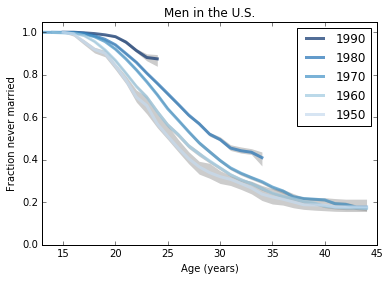

In [166]:
options_m = dict(formats=['pdf', 'png'], clf=False, title='Men in the U.S.')
PlotSurvivalFunctions('marriage7', sf_map_male, None, **options_m)

In [167]:
%time sf_map_male_pred = marriage.EstimateSurvivalByCohort(males, iters=11, cutoffs=cutoffs2, predict_flag=True)
del sf_map_male_pred[100]

CPU times: user 848 ms, sys: 0 ns, total: 848 ms
Wall time: 842 ms


Writing marriage8.pdf
Writing marriage8.png


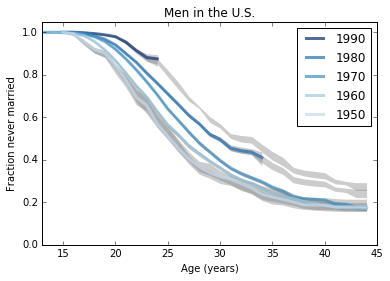

In [168]:
PlotSurvivalFunctions('marriage8', sf_map_male, sf_map_male_pred, **options_m)

In [169]:
MakePercentageTable(sf_map_male)

50 & 65 & 27 & 18 \\
60 & 69 & 29 & 17 \\
70 & 77 & 32 & 18 \\
80 & 81 & 44 & nan \\
90 & 88 & nan & nan \\


In [170]:
MakePercentageTable(sf_map_male_pred)

50 & 66 & 27 & 18 \\
60 & 70 & 29 & 18 \\
70 & 76 & 31 & 18 \\
80 & 81 & 43 & 24 \\
90 & 87 & 49 & 27 \\


Writing marriage9.pdf
Writing marriage9.png


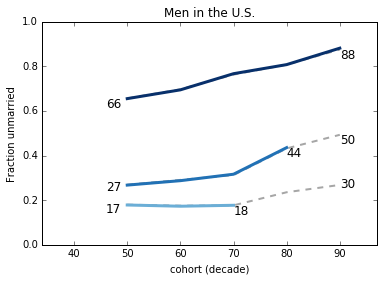

In [171]:
ages = [43, 33, 23]
PlotFractions(sf_map_male_pred, ages=ages, color='gray', linestyle='dashed', linewidth=2)
PlotFractions(sf_map_male, ages=ages, label_flag=True, alpha=1)

fontsize=12
thinkplot.Text(46, 0.66, '66', fontsize=fontsize)
thinkplot.Text(46, 0.29, '27', fontsize=fontsize)
thinkplot.Text(46, 0.19, '17', fontsize=fontsize)

thinkplot.Text(90, 0.88, '88', fontsize=fontsize)
thinkplot.Text(90, 0.50, '50', fontsize=fontsize)
thinkplot.Text(90, 0.30, '30', fontsize=fontsize)

thinkplot.Text(80, 0.44, '44', fontsize=fontsize)
thinkplot.Text(70, 0.18, '18', fontsize=fontsize)

thinkplot.Config(xlim=[34, 97], ylim=[0, 1], legend=True, loc='top left',
                 xlabel='cohort (decade)', ylabel='Fraction unmarried', 
                 title='Men in the U.S.')

thinkplot.Save(root='marriage9', **options)

## Divorce

In [443]:
reload(marriage)

resp9 = marriage.ReadFemResp2015()
marriage.Validate2015(resp9)

resp8 = marriage.ReadFemResp2013()
marriage.Validate2013(resp8)

resp7 = marriage.ReadFemResp2010()
marriage.Validate2010(resp7)

resp6 = marriage.ReadFemResp2002()
marriage.Validate2002(resp6)

married_resps = [resp[resp.evrmarry] for resp in [resp6, resp7, resp8, resp9]]

In [444]:
for df in married_resps:
    df['complete'] = df.divorced
    df['complete_var'] = df.mar1diss / 12
    df['ongoing_var'] = df.mar1diss / 12
    df['complete_missing'] = df.complete & df.complete_var.isnull()
    df['ongoing_missing'] = ~df.complete & df.ongoing_var.isnull()
    print(sum(df.complete_missing), sum(df.ongoing_missing))
    
    # combine the 90s and 80s cohorts
    # df.loc[df.birth_index==90, 'birth_index'] = 80

0 0
0 0
0 0
0 0


In [445]:
df = pd.concat(married_resps, ignore_index=True)
len(df)

14513

In [446]:
complete = df.loc[df.complete, 'complete_var']
complete.describe()

count    4317.000000
mean        4.864451
std         4.186298
min         0.000000
25%         1.666667
50%         3.833333
75%         6.833333
max        26.750000
Name: complete_var, dtype: float64

In [447]:
ongoing = df.loc[~df.complete, 'complete_var']
ongoing.describe()

count    10196.000000
mean         8.347121
std          6.106235
min          0.000000
25%          3.166667
50%          7.250000
75%         12.500000
max         29.000000
Name: complete_var, dtype: float64

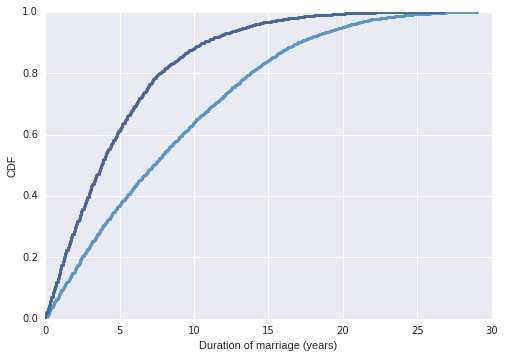

In [448]:
thinkplot.Cdf(thinkstats2.Cdf(complete))
thinkplot.Cdf(thinkstats2.Cdf(ongoing))
thinkplot.Config(xlabel='Duration of marriage (years)',
                 ylabel='CDF')

In [449]:
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

0	14513	50	45	0.0034
0.0833	14418	43	61	0.003
0.167	14314	55	65	0.0038
0.25	14194	49	87	0.0035
0.333	14058	49	68	0.0035
0.417	13941	67	76	0.0048
0.5	13798	60	70	0.0043
0.583	13668	53	76	0.0039
0.667	13539	40	54	0.003
0.75	13445	53	60	0.0039
0.833	13332	49	67	0.0037
0.917	13216	59	90	0.0045
1	13067	75	58	0.0057
1.08	12934	54	75	0.0042
1.17	12805	54	62	0.0042
1.25	12689	62	65	0.0049
1.33	12562	52	63	0.0041
1.42	12447	41	70	0.0033
1.5	12336	40	49	0.0032
1.58	12247	48	63	0.0039
1.67	12136	46	74	0.0038
1.75	12016	46	55	0.0038
1.83	11915	53	52	0.0044
1.92	11810	38	63	0.0032
2	11709	57	77	0.0049
2.08	11575	41	80	0.0035
2.17	11454	35	70	0.0031
2.25	11349	40	69	0.0035
2.33	11240	49	86	0.0044
2.42	11105	54	64	0.0049
2.5	10987	37	66	0.0034
2.58	10884	43	69	0.004
2.67	10772	42	45	0.0039
2.75	10685	40	68	0.0037
2.83	10577	43	54	0.0041
2.92	10480	52	57	0.005
3	10371	44	72	0.0042
3.08	10255	48	58	0.0047
3.17	10149	34	73	0.0034
3.25	10042	45	55	0.0045
3.33	9942	46	63	0.0046
3.42	9833	31	65	0.0032
3.5	

In [450]:
hf, sf = marriage.EstimateSurvival(df)

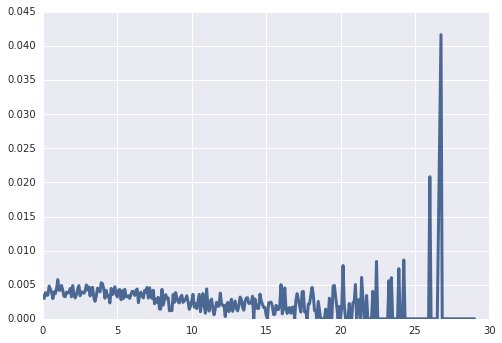

In [451]:
thinkplot.Plot(hf)

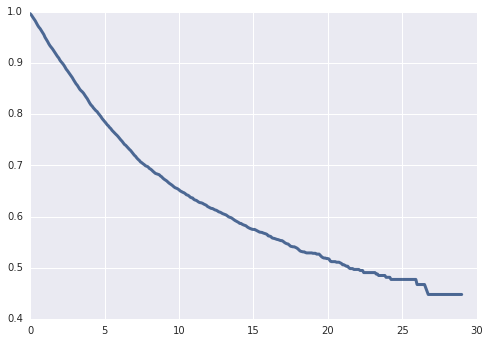

In [452]:
thinkplot.Plot(sf)

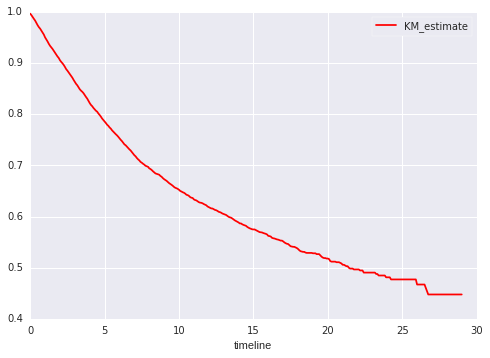

In [467]:
from lifelines import KaplanMeierFitter


kmf = KaplanMeierFitter()
kmf.fit(df.complete_var, event_observed=df.complete)
kmf.survival_function_.plot(color='red')
thinkplot.Config(xlim=[0, 30])

In [454]:
colors = sns.color_palette("colorblind", 5)
cohorts = [80, 70, 60, 50, 90]
colormap = dict(zip(cohorts, colors))

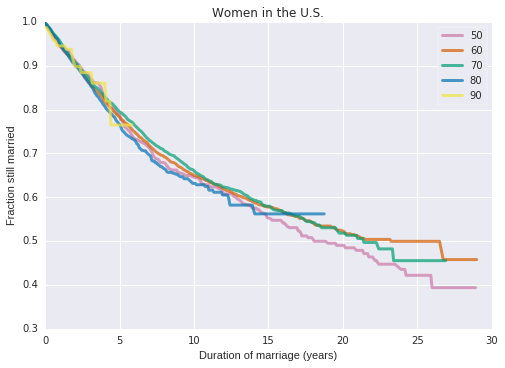

In [455]:
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    hf, sf = marriage.EstimateSurvival(group)
    thinkplot.Plot(sf, label=name, color=colormap[name])

thinkplot.Config(title='Women in the U.S.',
                 xlabel='Duration of marriage (years)',
                 ylabel='Fraction still married',
                 xlim=[0, 30], ylim=[0.3, 1])

In [456]:
last = grouped.get_group(80)
complete = last[last.complete].complete_var
ongoing = last[~last.complete].ongoing_var
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

0	3218	9	17	0.0028
0.0833	3192	9	25	0.0028
0.167	3158	16	36	0.0051
0.25	3106	7	42	0.0023
0.333	3057	13	35	0.0043
0.417	3009	14	40	0.0047
0.5	2955	13	33	0.0044
0.583	2909	11	36	0.0038
0.667	2862	10	30	0.0035
0.75	2822	11	29	0.0039
0.833	2782	9	27	0.0032
0.917	2746	18	37	0.0066
1	2691	19	28	0.0071
1.08	2644	11	34	0.0042
1.17	2599	9	31	0.0035
1.25	2559	11	35	0.0043
1.33	2513	8	30	0.0032
1.42	2475	10	29	0.004
1.5	2436	9	24	0.0037
1.58	2403	12	34	0.005
1.67	2357	12	40	0.0051
1.75	2305	10	26	0.0043
1.83	2269	11	16	0.0048
1.92	2242	6	29	0.0027
2	2207	11	33	0.005
2.08	2163	7	32	0.0032
2.17	2124	7	30	0.0033
2.25	2087	6	30	0.0029
2.33	2051	10	43	0.0049
2.42	1998	9	25	0.0045
2.5	1964	7	24	0.0036
2.58	1933	9	34	0.0047
2.67	1890	10	20	0.0053
2.75	1860	7	31	0.0038
2.83	1822	8	20	0.0044
2.92	1794	8	28	0.0045
3	1758	6	34	0.0034
3.08	1718	11	21	0.0064
3.17	1686	5	31	0.003
3.25	1650	11	28	0.0067
3.33	1611	12	24	0.0074
3.42	1575	7	26	0.0044
3.5	1542	8	22	0.0052
3.58	1512	4	26	0.0026
3.67	1482	9	30	0.0061

So far:

1. Doesn't take into account sampling weights.

2. Doesn't take into account `agemarry`.

3. Vulnerable to small errors in tail.

In [457]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=101)

CPU times: user 5.63 s, sys: 0 ns, total: 5.63 s
Wall time: 5.63 s


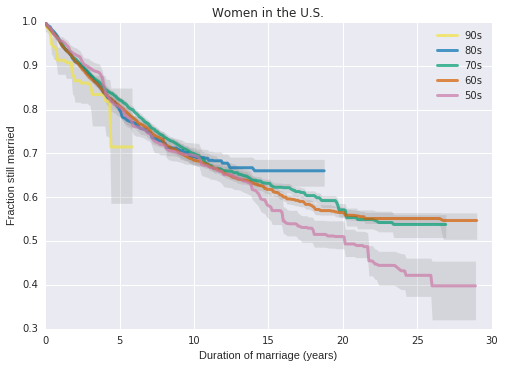

In [458]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

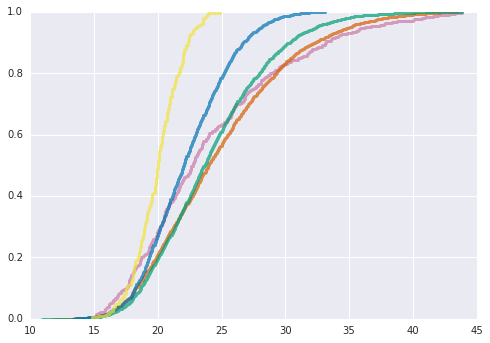

In [459]:
for name, group in iter(grouped):
    cdf = thinkstats2.Cdf(group.agemarry)
    thinkplot.Cdf(cdf, label=name, color=colormap[name])

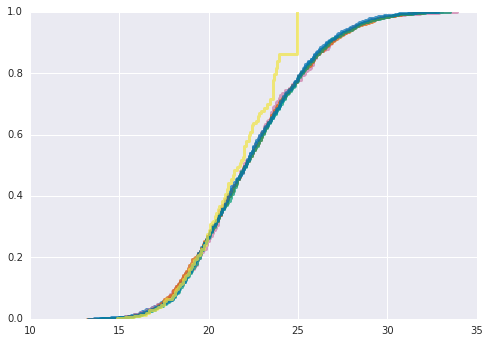

In [460]:
name = 80
last = grouped.get_group(name)
thinkplot.Cdf(thinkstats2.Cdf(last.agemarry), label=name, color=colormap[name])

for name, group in iter(grouped):
    if name != '80':
        matched = marriage.PropensityMatch(last, group, colname='agemarry')
        thinkplot.Cdf(thinkstats2.Cdf(matched.agemarry), label=name, color=colormap[name])

In [461]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=21, prop_match=80)

CPU times: user 3min 38s, sys: 8 ms, total: 3min 38s
Wall time: 3min 37s


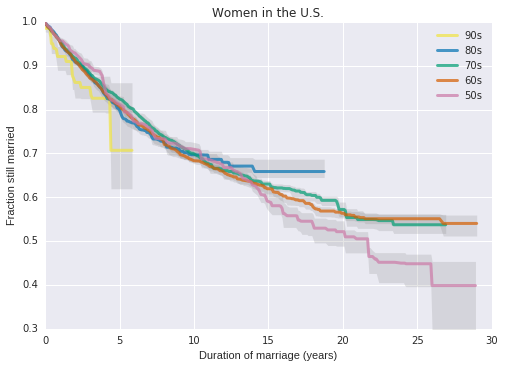

In [468]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [469]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=21, error_rate=0.1)

CPU times: user 23.7 s, sys: 88 ms, total: 23.8 s
Wall time: 23.8 s


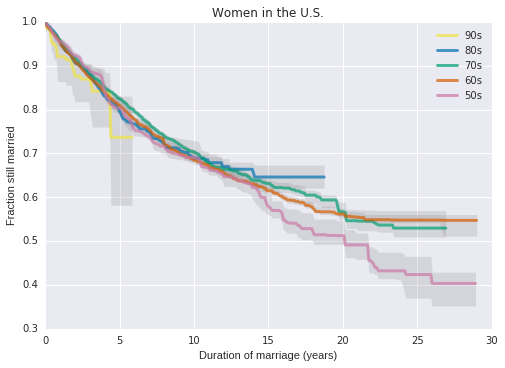

In [470]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [476]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_resps, iters=21, prop_match=80)

CPU times: user 3min 37s, sys: 104 ms, total: 3min 37s
Wall time: 3min 37s


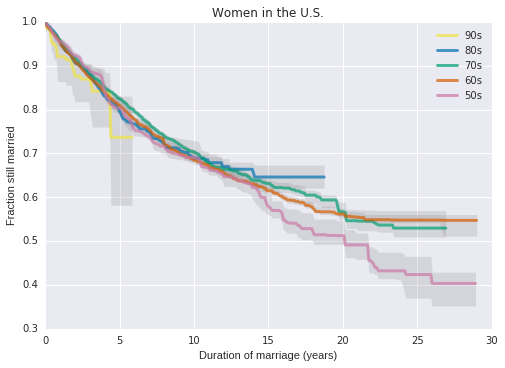

In [470]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [471]:
def MakeTable(sf_map, ages):
    t = []
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        t.append((name, vals))
    return t

In [474]:
def MakePercentageTable(sf_map, ages=[6, 16, 26]):
    t = MakeTable(sf_map, ages)
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        print(name, '&', ' & '.join('%0.0f' % (val*100) for val in vals), r'\\')
        
MakePercentageTable(sf_map)

50 & 75 & 55 & 40 \\
60 & 78 & 60 & 55 \\
70 & 80 & 62 & 53 \\
80 & 77 & 65 & nan \\
90 & nan & nan & nan \\


# Male respondents

In [502]:
reload(marriage)

male2010 = marriage.ReadMaleResp2010()
male2010.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,wgtq1q16,...,divsep,cmmarrhx,finalwgt,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,36133,1043,False,NaN,6,0,NaN,NaN,NaN,7270.577055,...,False,NaN,7270.577055,NaN,23.333333,False,86,23.0,NaN,80
1,36636,1021,False,NaN,6,0,NaN,NaN,NaN,7601.733277,...,False,NaN,7601.733277,NaN,25.083333,False,85,25.0,NaN,80
2,41125,1118,False,NaN,6,0,NaN,NaN,NaN,4587.699601,...,False,NaN,4587.699601,NaN,17.000000,False,93,17.0,NaN,90
3,23607,948,False,NaN,6,0,NaN,NaN,NaN,26566.111007,...,False,NaN,26566.111007,NaN,28.250000,False,78,28.0,NaN,70
4,40814,1018,False,NaN,2,0,NaN,NaN,NaN,5709.710317,...,False,NaN,5709.710317,NaN,25.333333,False,84,25.0,NaN,80


In [503]:
male2013 = marriage.ReadMaleResp2013()
male2013.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,wgt2011_2013,...,divsep,cmmarrhx,finalwgt,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,50001,1027,True,1346.0,4,1,1237.0,1.0,87.0,8111.081751,...,True,1237.0,8111.081751,17.500000,26.750000,False,85,26.0,17.0,80
1,50003,1160,False,NaN,6,0,NaN,NaN,NaN,4082.414347,...,False,NaN,4082.414347,NaN,16.166667,False,96,16.0,NaN,90
2,50006,1025,True,NaN,1,1,1335.0,NaN,25.0,25550.455475,...,False,1335.0,25550.455475,25.833333,27.916667,False,85,27.0,25.0,80
3,50007,1028,False,NaN,6,0,NaN,NaN,NaN,6754.912773,...,False,NaN,6754.912773,NaN,26.666667,False,85,26.0,NaN,80
4,50009,855,True,NaN,1,1,1152.0,NaN,210.0,49442.342886,...,False,1152.0,49442.342886,24.750000,42.250000,False,71,42.0,24.0,70


In [504]:
male2015 = marriage.ReadMaleResp2015()
male2015.head()

,caseid,cmbirth,evrmarry,cmdivw,rmarital,fmarno,mardat01,marend01,mar1diss,wgt2013_2015,...,divsep,cmmarrhx,finalwgt,agemarry,age,missing,year,age_index,agemarry_index,birth_index
0,60417,926,False,NaN,2,0,NaN,NaN,NaN,7693.012917,...,False,NaN,7693.012917,NaN,37.750000,False,77,37.0,NaN,70
1,60421,1161,False,NaN,6,0,NaN,NaN,NaN,9643.271157,...,False,NaN,9643.271157,NaN,18.000000,False,96,18.0,NaN,90
2,60422,980,False,NaN,2,0,NaN,NaN,NaN,9650.615384,...,False,NaN,9650.615384,NaN,33.000000,False,81,33.0,NaN,80
3,60424,990,True,NaN,4,1,1326.0,1.0,45.0,11590.039167,...,True,1326.0,11590.039167,28.000000,32.166667,False,82,32.0,28.0,80
4,60425,1143,True,NaN,1,1,1376.0,NaN,7.0,6864.914673,...,False,1376.0,6864.914673,19.416667,20.000000,False,95,20.0,19.0,90


In [505]:
males = [male2010, male2013, male2015]
df2 = pd.concat(males, ignore_index=True)
len(df2)

19724

In [506]:
married_males = [resp[resp.evrmarry] for resp in [male2010, male2013, male2015]]

In [507]:
for df in married_males:
    df['complete'] = df.divorced
    df['complete_var'] = df.mar1diss / 12
    df['ongoing_var'] = df.mar1diss / 12
    df['complete_missing'] = df.complete & df.complete_var.isnull()
    df['ongoing_missing'] = ~df.complete & df.ongoing_var.isnull()
    print(sum(df.complete_missing), sum(df.ongoing_missing))
    
    # combine the 90s and 80s cohorts
    # df.loc[df.birth_index==90, 'birth_index'] = 80

0 0
0 0
0 0


In [508]:
df = pd.concat(married_males, ignore_index=True)
len(df)

7028

In [510]:
complete = df.loc[df.complete, 'complete_var']
complete.describe()

count    1920.000000
mean        4.421224
std         3.952697
min         0.000000
25%         1.500000
50%         3.166667
75%         6.250000
max        23.416667
Name: complete_var, dtype: float64

In [511]:
ongoing = df.loc[~df.complete, 'complete_var']
ongoing.describe()

count    5108.000000
mean        7.721091
std         5.636191
min         0.000000
25%         3.000000
50%         6.750000
75%        11.583333
max        32.333333
Name: complete_var, dtype: float64

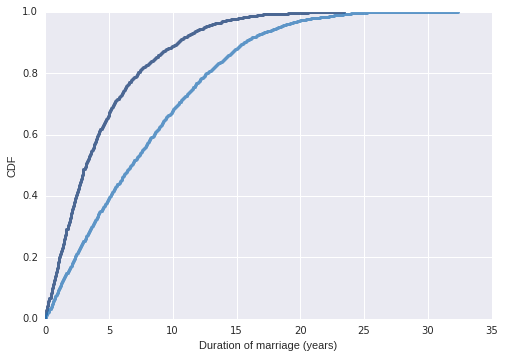

In [512]:
thinkplot.Cdf(thinkstats2.Cdf(complete))
thinkplot.Cdf(thinkstats2.Cdf(ongoing))
thinkplot.Config(xlabel='Duration of marriage (years)',
                 ylabel='CDF')

In [513]:
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

0	7028	27	19	0.0038
0.0833	6982	26	36	0.0037
0.167	6920	25	35	0.0036
0.25	6860	33	28	0.0048
0.333	6799	18	42	0.0026
0.417	6739	30	43	0.0045
0.5	6666	35	45	0.0053
0.583	6586	26	43	0.0039
0.667	6517	20	39	0.0031
0.75	6458	25	44	0.0039
0.833	6389	25	30	0.0039
0.917	6334	26	29	0.0041
1	6279	41	48	0.0065
1.08	6190	30	36	0.0048
1.17	6124	21	30	0.0034
1.25	6073	15	42	0.0025
1.33	6016	17	41	0.0028
1.42	5958	26	37	0.0044
1.5	5895	35	29	0.0059
1.58	5831	22	31	0.0038
1.67	5778	38	33	0.0066
1.75	5707	25	33	0.0044
1.83	5649	22	28	0.0039
1.92	5599	20	40	0.0036
2	5539	32	21	0.0058
2.08	5486	27	44	0.0049
2.17	5415	18	43	0.0033
2.25	5354	25	28	0.0047
2.33	5301	26	41	0.0049
2.42	5234	17	33	0.0032
2.5	5184	22	27	0.0042
2.58	5135	20	31	0.0039
2.67	5084	19	41	0.0037
2.75	5024	21	24	0.0042
2.83	4979	20	32	0.004
2.92	4927	23	32	0.0047
3	4872	38	36	0.0078
3.08	4798	12	38	0.0025
3.17	4748	24	39	0.0051
3.25	4685	14	32	0.003
3.33	4639	14	28	0.003
3.42	4597	18	31	0.0039
3.5	4548	15	33	0.0033
3.58	4500	14	28	0.003

In [514]:
hf, sf = marriage.EstimateSurvival(df)

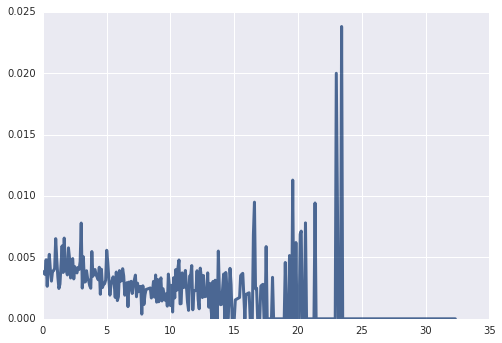

In [515]:
thinkplot.Plot(hf)

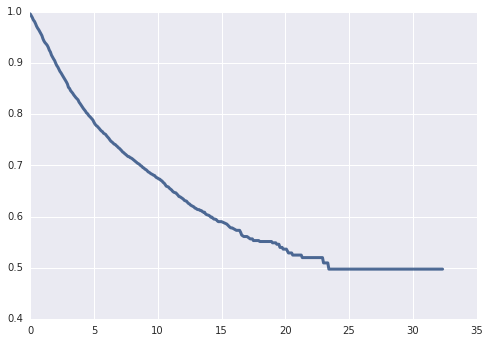

In [516]:
thinkplot.Plot(sf)

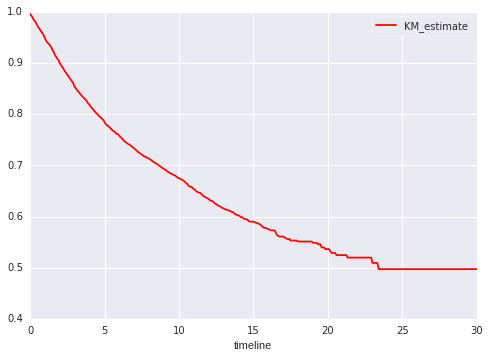

In [517]:
from lifelines import KaplanMeierFitter


kmf = KaplanMeierFitter()
kmf.fit(df.complete_var, event_observed=df.complete)
kmf.survival_function_.plot(color='red')
thinkplot.Config(xlim=[0, 30])

In [518]:
colors = sns.color_palette("colorblind", 5)
cohorts = [80, 70, 60, 50, 90]
colormap = dict(zip(cohorts, colors))

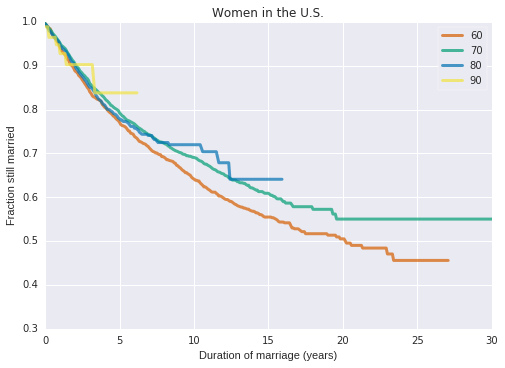

In [519]:
grouped = df.groupby('birth_index')
for name, group in iter(grouped):
    hf, sf = marriage.EstimateSurvival(group)
    thinkplot.Plot(sf, label=name, color=colormap[name])

thinkplot.Config(title='Women in the U.S.',
                 xlabel='Duration of marriage (years)',
                 ylabel='Fraction still married',
                 xlim=[0, 30], ylim=[0.3, 1])

In [520]:
last = grouped.get_group(80)
complete = last[last.complete].complete_var
ongoing = last[~last.complete].ongoing_var
hf = survival.EstimateHazardFunction(complete, ongoing, verbose=True)

0	1788	8	13	0.0045
0.0833	1767	5	21	0.0028
0.167	1741	10	23	0.0057
0.25	1708	11	16	0.0064
0.333	1681	5	21	0.003
0.417	1655	6	19	0.0036
0.5	1630	7	20	0.0043
0.583	1603	8	23	0.005
0.667	1572	4	16	0.0025
0.75	1552	4	27	0.0026
0.833	1521	4	16	0.0026
0.917	1501	5	24	0.0033
1	1472	12	28	0.0082
1.08	1432	5	25	0.0035
1.17	1402	7	12	0.005
1.25	1383	2	28	0.0014
1.33	1353	4	17	0.003
1.42	1332	4	21	0.003
1.5	1307	7	18	0.0054
1.58	1282	5	19	0.0039
1.67	1258	9	16	0.0072
1.75	1233	8	17	0.0065
1.83	1208	4	15	0.0033
1.92	1189	2	22	0.0017
2	1165	7	9	0.006
2.08	1149	9	20	0.0078
2.17	1120	3	26	0.0027
2.25	1091	7	12	0.0064
2.33	1072	4	19	0.0037
2.42	1049	4	13	0.0038
2.5	1032	4	13	0.0039
2.58	1015	4	18	0.0039
2.67	993	5	23	0.005
2.75	965	3	10	0.0031
2.83	952	6	13	0.0063
2.92	933	5	20	0.0054
3	908	4	19	0.0044
3.08	885	1	24	0.0011
3.17	860	3	20	0.0035
3.25	837	4	18	0.0048
3.33	815	4	9	0.0049
3.42	802	6	15	0.0075
3.5	781	4	10	0.0051
3.58	767	4	14	0.0052
3.67	749	2	15	0.0027
3.75	732	2	12	0.0027
3.83	718	4	10	0

So far:

1. Doesn't take into account sampling weights.

2. Doesn't take into account `agemarry`.

3. Vulnerable to small errors in tail.

In [525]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=101)

CPU times: user 3.62 s, sys: 0 ns, total: 3.62 s
Wall time: 3.61 s


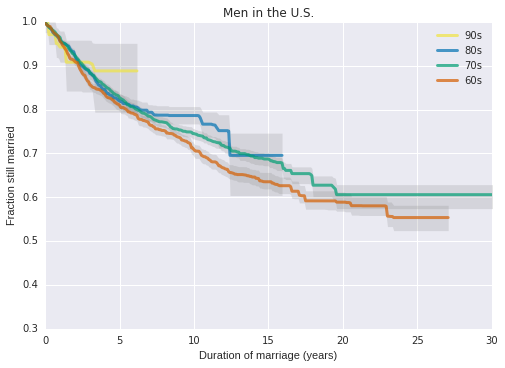

In [526]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Men in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

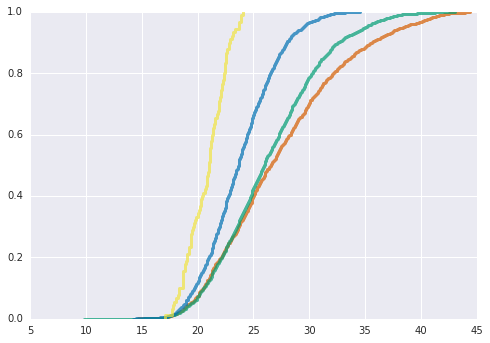

In [527]:
for name, group in iter(grouped):
    cdf = thinkstats2.Cdf(group.agemarry)
    thinkplot.Cdf(cdf, label=name, color=colormap[name])

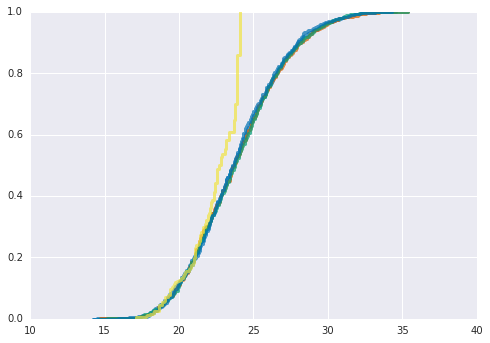

In [528]:
name = 80
last = grouped.get_group(name)
thinkplot.Cdf(thinkstats2.Cdf(last.agemarry), label=name, color=colormap[name])

for name, group in iter(grouped):
    if name != '80':
        matched = marriage.PropensityMatch(last, group, colname='agemarry')
        thinkplot.Cdf(thinkstats2.Cdf(matched.agemarry), label=name, color=colormap[name])

In [529]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=21, prop_match=80)

CPU times: user 1min 10s, sys: 0 ns, total: 1min 10s
Wall time: 1min 10s


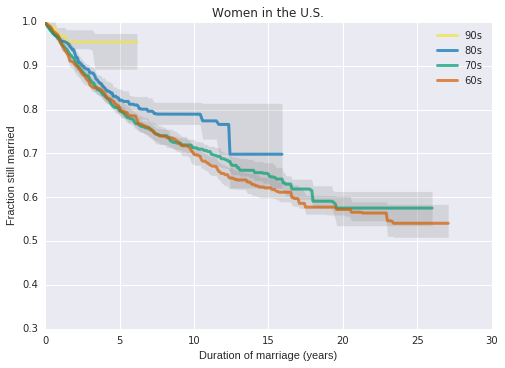

In [530]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [531]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=21, error_rate=0.1)

CPU times: user 18.7 s, sys: 80 ms, total: 18.8 s
Wall time: 18.8 s


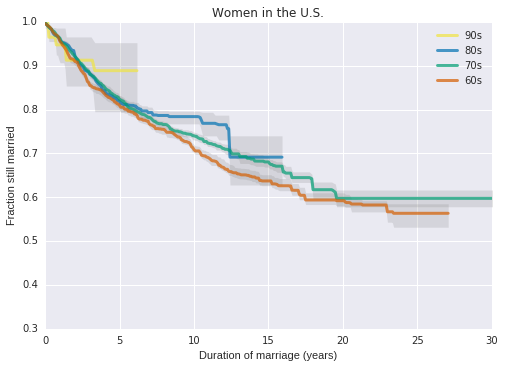

In [532]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [533]:
reload(marriage)

%time sf_map = marriage.EstimateSurvivalByCohort(married_males, iters=21, prop_match=80)

CPU times: user 1min 9s, sys: 0 ns, total: 1min 9s
Wall time: 1min 9s


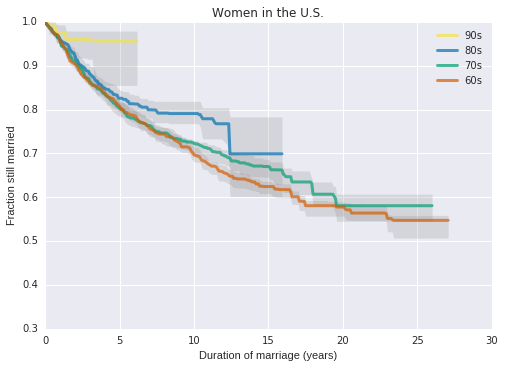

In [534]:
reload(marriage)

marriage.PlotSurvivalFunctions(sf_map, colormap=colormap)

thinkplot.Config(title='Women in the U.S.',
                     xlabel='Duration of marriage (years)',
                     ylabel='Fraction still married',
                     xlim=[0, 30], ylim=[0.3, 1],
                     legend=True, loc='upper right', frameon=False)

In [535]:
def MakeTable(sf_map, ages):
    t = []
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        t.append((name, vals))
    return t

In [536]:
def MakePercentageTable(sf_map, ages=[6, 16, 26]):
    t = MakeTable(sf_map, ages)
    for name, sf_seq in sorted(sf_map.items()):
        ts, ss = marriage.MakeSurvivalCI(sf_seq, [50])
        ss = ss[0]
        vals = [np.interp(age, ts, ss, right=np.nan) for age in ages]
        print(name, '&', ' & '.join('%0.0f' % (val*100) for val in vals), r'\\')
        
MakePercentageTable(sf_map)

60 & 79 & 62 & 55 \\
70 & 78 & 65 & 58 \\
80 & 81 & nan & nan \\
90 & 96 & nan & nan \\
